In [1]:
import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread


In [2]:
data_dir = r'C:\Users\Hoi\Desktop\imgs2'
data = np.load(join(data_dir, r'data.npz'))

allpos, allimgs = data['pos'], data['img']



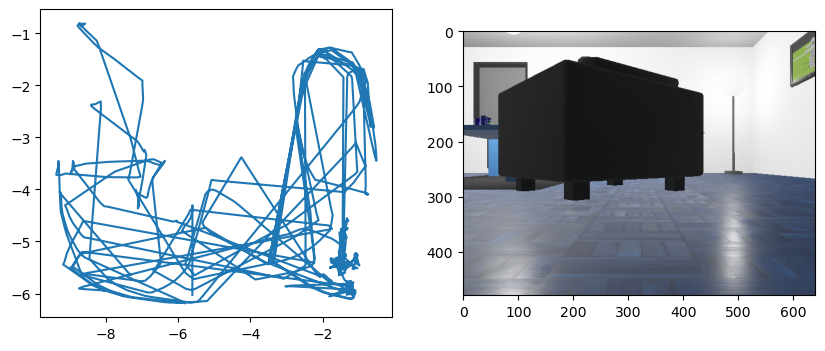

In [3]:
fig, ax = plt.subplots(1, 2 , figsize=(10, 4))
ax[0].plot(allpos[:, 1], allpos[:, 2])
ax[1].imshow(allimgs[0, :, :, :])

In [4]:
tmp1 = allimgs[:, np.arange(0, allimgs.shape[1], 8), :, :]
tmp2 = tmp1[:, :, np.arange(0, allimgs.shape[2], 8), :]
print(tmp2.shape, allimgs.shape)
subimgs = tmp2.reshape(tmp2.shape[0], -1)
print(subimgs.shape)

(2018, 60, 80, 4) (2018, 480, 640, 4)
(2018, 19200)


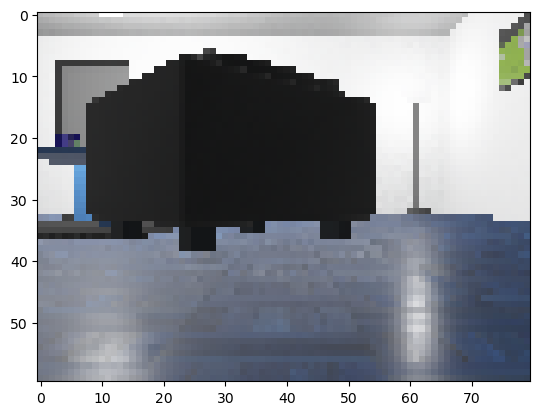

In [5]:
plt.imshow(tmp2[0, :, :, :])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(10)
subimgs_PCA = pca.fit_transform(subimgs)

In [7]:
subimgs_PCA.shape

(2018, 10)

2017/2018, feature num = 32

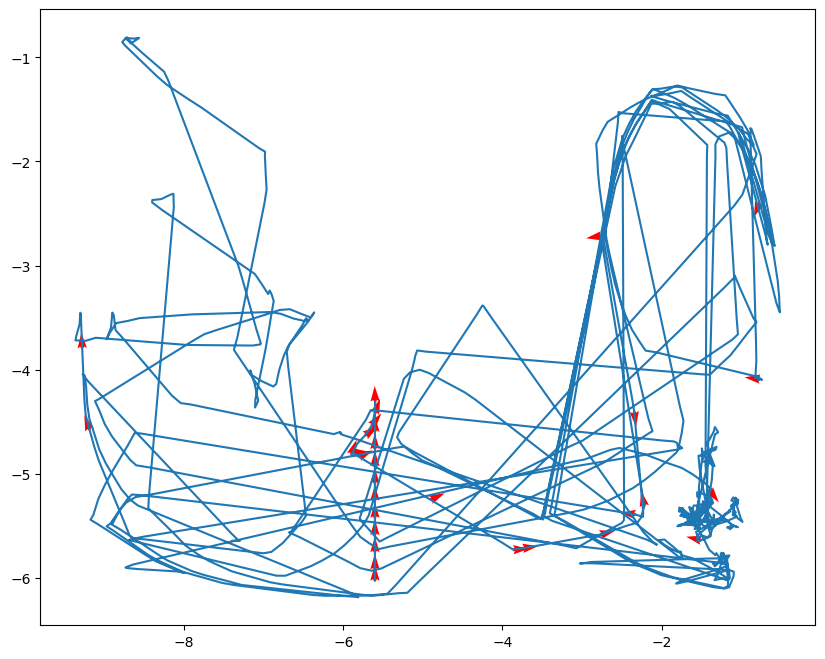

In [8]:

errfrac = 0.99
features = []
features_ind = []
for i in range(allimgs.shape[0]):
    print('\r%d/%d, feature num = %d'%(i, subimgs_PCA.shape[0], len(features)), end='', flush=True)

    img = subimgs_PCA[i, :]
    Flen = len(features)

    if Flen == 0:
        features.append(img)
        features_ind.append(i)

    else:
        diff_count = 0
        for feaimg in features:
            err = np.sqrt(np.sum(np.square(feaimg.astype(float) - img.astype(float)))) / Flen / 255
            if err > errfrac:
                diff_count += 1
        if diff_count == Flen:
            features.append(img)
            features_ind.append(i)


fig, ax = plt.subplots(figsize=(10, 8))
feapos = allpos[features_ind, :]
feaangles = feapos[:, 4]
angvec = np.exp(1j * feaangles)
ax.plot(allpos[:, 1], allpos[:, 2])
# ax.scatter(feapos[:, 1], feapos[:, 2], marker='x', c='r')
ax.quiver(feapos[:, 1], feapos[:, 2], np.real(angvec), np.imag(angvec), color='r', scale=50)
